# Movie reviews Classification

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/nlp/rev.png" width="1200">



## Cleaning Text with NLTK

In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/nlp/txt_sentoken.zip

--2022-04-05 12:48:36--  https://frenzy86.s3.eu-west-2.amazonaws.com/python/nlp/txt_sentoken.zip
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.150.6
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.150.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2781673 (2.7M) [application/octet-stream]
Saving to: ‘txt_sentoken.zip’

txt_sentoken.zip    100%[===================>]   2.65M  4.27MB/s    in 0.6s    

2022-04-05 12:48:38 (4.27 MB/s) - ‘txt_sentoken.zip’ saved [2781673/2781673]



In [ ]:
!unzip txt_sentoken.zip

Archive:  txt_sentoken.zip
   creating: txt_sentoken/
   creating: txt_sentoken/neg/
  inflating: txt_sentoken/neg/cv000_29416.txt  
  inflating: txt_sentoken/neg/cv001_19502.txt  
  inflating: txt_sentoken/neg/cv002_17424.txt  
  inflating: txt_sentoken/neg/cv003_12683.txt  
  inflating: txt_sentoken/neg/cv004_12641.txt  
  inflating: txt_sentoken/neg/cv005_29357.txt  
  inflating: txt_sentoken/neg/cv006_17022.txt  
  inflating: txt_sentoken/neg/cv007_4992.txt  
  inflating: txt_sentoken/neg/cv008_29326.txt  
  inflating: txt_sentoken/neg/cv009_29417.txt  
  inflating: txt_sentoken/neg/cv010_29063.txt  
  inflating: txt_sentoken/neg/cv011_13044.txt  
  inflating: txt_sentoken/neg/cv012_29411.txt  
  inflating: txt_sentoken/neg/cv013_10494.txt  
  inflating: txt_sentoken/neg/cv014_15600.txt  
  inflating: txt_sentoken/neg/cv015_29356.txt  
  inflating: txt_sentoken/neg/cv016_4348.txt  
  inflating: txt_sentoken/neg/cv017_23487.txt  
  inflating: txt_sentoken/neg/cv018_21672.txt  
  inf

The load_files function automatically divides the dataset into data and target sets. For instance, in our case, we will pass it the path to the "txt_sentoken" directory. The load_files will treat each folder inside the "txt_sentoken" folder as one category and all the documents inside that folder will be assigned its corresponding category.

the load_files function loads the data from both "neg" and "pos" folders into the X variable, while the target categories are stored in y. Here X is a list of 2000 string type elements where each element corresponds to single user review. Similarly, y is a numpy array of size 2000. If you print y on the screen, you will see an array of 1s and 0s. This is because, for each category, the load_files function adds a number to the target numpy array. We have two categories: "neg" and "pos", therefore 1s and 0s have been added to the target array.

In [ ]:
movie_data = load_files(r"txt_sentoken")
X, y = movie_data.data, movie_data.target

In [ ]:
X

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
## CLEANING DOCUMENT WITH NLTK

from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()

documents = []

for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)  
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)  
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    # Converting to Lowercase
    document = document.lower()
    # Lemmatization
    document = document.split()
    document = [lemma.lemmatize(word) for word in document]
    document = ' '.join(document)
    documents.append(document)

In [ ]:
documents

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
text = ''.join(documents)

## Wordcloud cleaned text

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color = 'black', width = 800, height = 400,
                      max_words = 180, contour_width = 3,
                      max_font_size = 80, contour_color = 'steelblue',
                      stopwords = STOPWORDS, random_state = 667)

wordcloud.generate(text)

plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

## Bag of Words + remove stopwords


All the documents can contain tens of thousands of unique words. But the words that have a very low frequency of occurrence are unusually not a good parameter for classifying documents. Therefore we set the max_features parameter to 1500, which means that we want to use 1500 most occurring words as features for training our classifier.

min_df is set to 5. This corresponds to the minimum number of documents that should contain this feature. So we only include those words that occur in at least 5 documents. Similarly, for the max_df, feature the value is set to 0.7; in which the fraction corresponds to a percentage. Here 0.7 means that we should include only those words that occur in a maximum of 70% of all the documents. 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, 
                             stop_words=stopwords.words('english'))
X_ = vectorizer.fit_transform(documents).toarray()
X_

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 1, 0, 0]])

## TF-IDF
he TF stands for "Term Frequency" while IDF stands for "Inverse Document Frequency".The term frequency is calculated as:

- Term frequency = (Number of Occurrences of a word)/(Total words in the document)

- IDF(word) = Log((Total number of documents)/(Number of documents containing the word))



In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidfconverter = TfidfTransformer()
X_ = tfidfconverter.fit_transform(X_).toarray()

In [ ]:
#tou can do the BOW + TF-IDF all in one with TfidfVectorizer

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
# X = tfidfconverter.fit_transform(documents).toarray()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_, y,
                                                    test_size=0.25, 
                                                    random_state=667
                                                    )

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

>1, train: 0.709, test: 0.701
>2, train: 0.709, test: 0.701
>3, train: 0.709, test: 0.701
>4, train: 0.712, test: 0.701
>5, train: 0.721, test: 0.701
>6, train: 0.749, test: 0.701
>7, train: 0.792, test: 0.701
>8, train: 0.842, test: 0.701
>9, train: 0.889, test: 0.703
>10, train: 0.933, test: 0.703
>11, train: 0.953, test: 0.703
>12, train: 0.973, test: 0.706
>13, train: 0.986, test: 0.709
>14, train: 0.992, test: 0.706
>15, train: 0.995, test: 0.715
>16, train: 0.996, test: 0.712
>17, train: 0.997, test: 0.709
>18, train: 0.997, test: 0.718
>19, train: 0.997, test: 0.720
>20, train: 0.998, test: 0.723


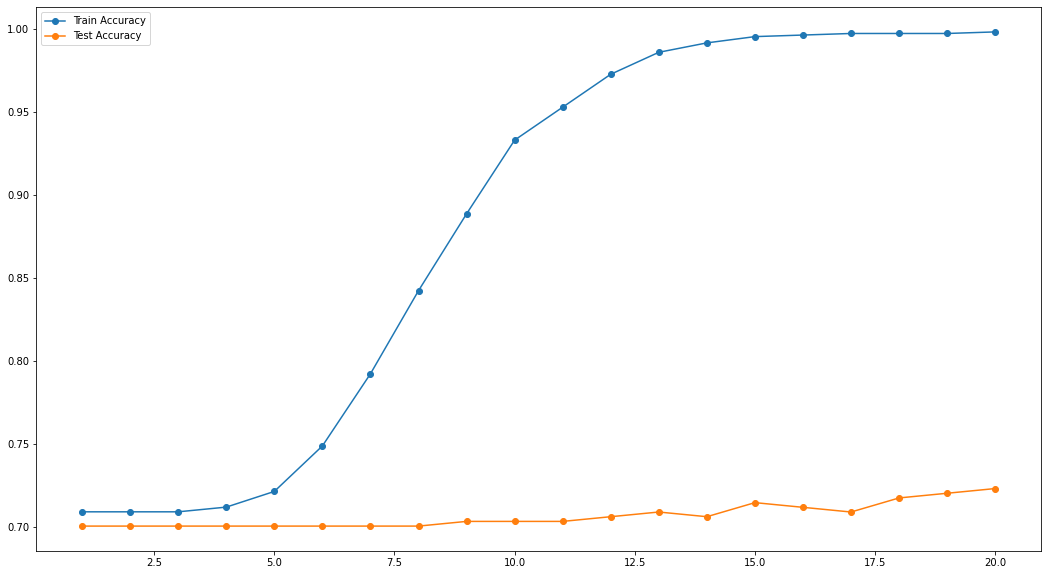

In [ ]:
train_scores, test_scores = [],[]
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = RandomForestClassifier(random_state=667, n_estimators=200,max_depth=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_y_pred = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_y_pred)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_y_pred = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_y_pred)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth

plt.figure(figsize=(18,10))
plt.plot(values, train_scores, '-o', label='Train Accuracy')
plt.plot(values, test_scores, '-o', label='Test Accuracy')
plt.legend()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=1000, random_state=667,max_depth=5)
classifier.fit(X_train, y_train) 

RandomForestClassifier(max_depth=5, n_estimators=1000, random_state=667)

## Try with MultinomialNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train) 

MultinomialNB()

In [ ]:
# accuracy score on the test data
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7146892655367232


In [ ]:
labels = ['Negative', 'Positive']

Text(69.0, 0.5, 'Actual')

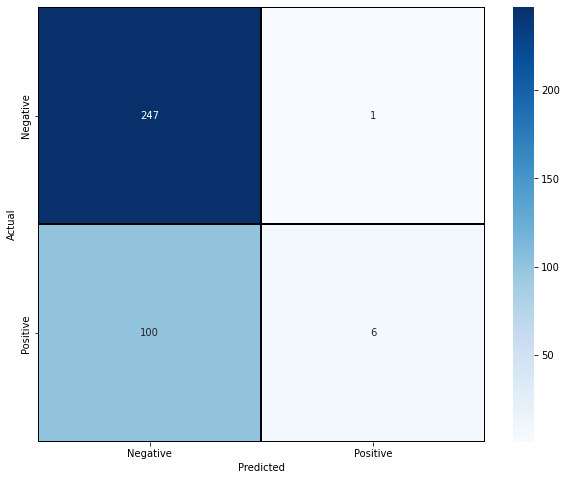

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = labels, 
            yticklabels = labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [ ]:
from sklearn.metrics import classification_report
#labels = ['class1', 'class2']
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

    Negative       0.71      1.00      0.83       248
    Positive       0.86      0.06      0.11       106

    accuracy                           0.71       354
   macro avg       0.78      0.53      0.47       354
weighted avg       0.76      0.71      0.61       354



In [ ]:
!pip install plot-metric --quiet

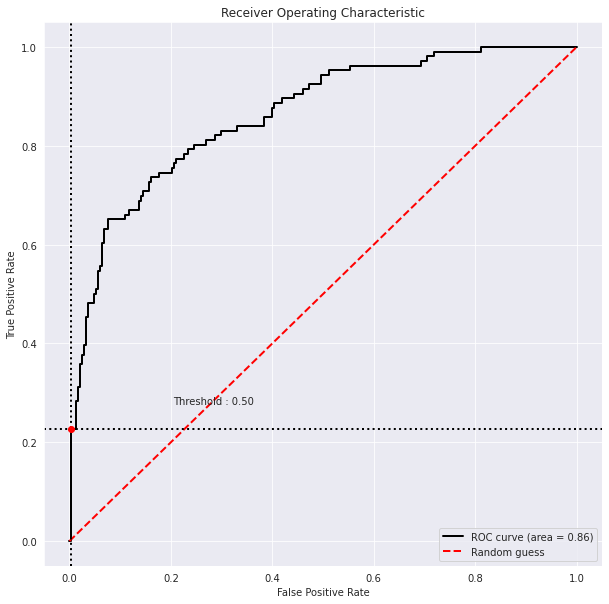

In [ ]:
from plot_metric.functions import BinaryClassification
y_pred_proba = classifier.predict_proba(X_test)[::,1]

#labels = ['class1', 'class2']
bc = BinaryClassification(y_test, y_pred_proba, labels=labels)

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve();

### SGD Classifier

In [ ]:
# accuracy score on the test data
from sklearn.linear_model import SGDClassifier

classifier = SGDClassifier(loss='log', penalty='l2',alpha=1e-3, random_state=667, max_iter=5, tol=None)
classifier.fit(X_train, y_train) 

y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.8248587570621468


In [ ]:
from sklearn.metrics import classification_report
#labels = ['class1', 'class2']
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

    Negative       0.83      0.94      0.88       248
    Positive       0.80      0.56      0.66       106

    accuracy                           0.82       354
   macro avg       0.81      0.75      0.77       354
weighted avg       0.82      0.82      0.81       354



Text(69.0, 0.5, 'Actual')

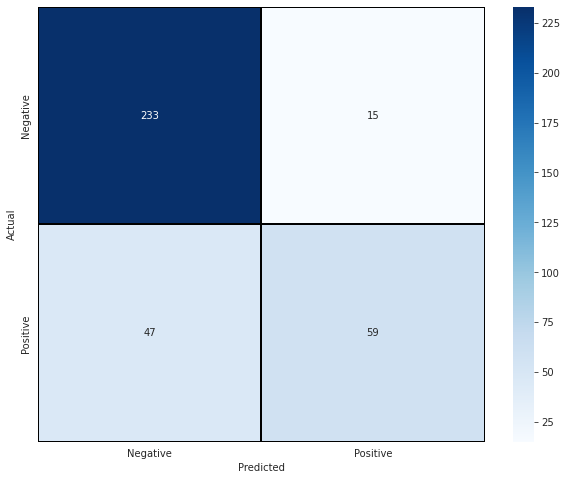

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = labels, 
            yticklabels = labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")

## Final Pipeline

In [ ]:
from sklearn.model_selection import train_test_split

X_array = np.array(documents) # Cleaned data
X_train, X_test, y_train, y_test = train_test_split(X_array, y,
                                                    test_size=0.25, 
                                                    random_state=667
                                                    )

In [ ]:
from sklearn.pipeline import Pipeline

bow = CountVectorizer(max_features=1500, min_df=5, max_df=0.7,stop_words=stopwords.words('english'))
tfidf = TfidfTransformer()
clf =SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=667, max_iter=5, tol=None)

pipe = Pipeline([
                ('bow',bow),
                ('tfidf',tfidf),
                ('clf',clf),
                ])

pipe.fit(X_train, y_train)

predicted = pipe.predict(X_test)

In [ ]:
test_data_accuracy = accuracy_score(predicted, y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.8248587570621468


In [ ]:
from sklearn.metrics import classification_report
#labels = ['class1', 'class2']
print(classification_report(y_test, predicted, target_names=labels))

              precision    recall  f1-score   support

    Negative       0.83      0.94      0.88       248
    Positive       0.79      0.57      0.66       106

    accuracy                           0.82       354
   macro avg       0.81      0.75      0.77       354
weighted avg       0.82      0.82      0.82       354



Text(69.0, 0.5, 'Actual')

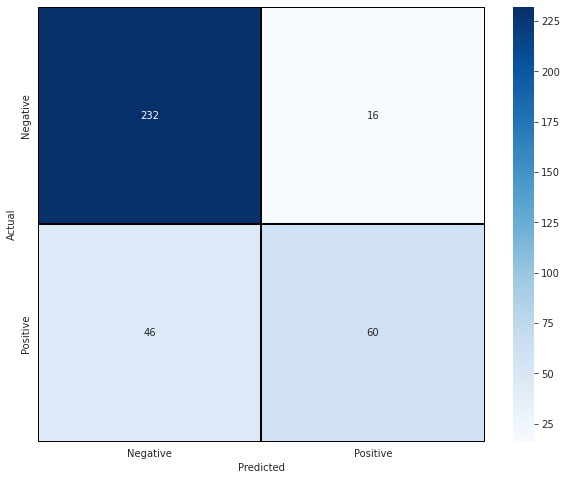

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, predicted)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = labels, 
            yticklabels = labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [ ]:
import joblib

joblib.dump(pipe,'pipeline_classifierTF_IDF.pkl')

['pipeline_classifierTF_IDF.pkl']